## Setup

In [1]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required


In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request


In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Get the data

In [5]:
url= "brain_stroke.csv"

In [6]:
brain = pd.read_csv(url)

In [7]:
brain.head() # Display the top five rows of the DataFrame
# 10 attributes with int, string and float

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [8]:
brain.info() 
# No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


Hypertension,age,heart_disease, avg_glucose, bmi and stroke are numeric. but the others are nominal 

In [9]:
brain["work_type"].value_counts()

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

In [10]:
#This method shows a statistical summary of the numerical attributes 
brain.describe() 

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


The count, mean, min, and max rows are self-explanatory.

The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations fall.

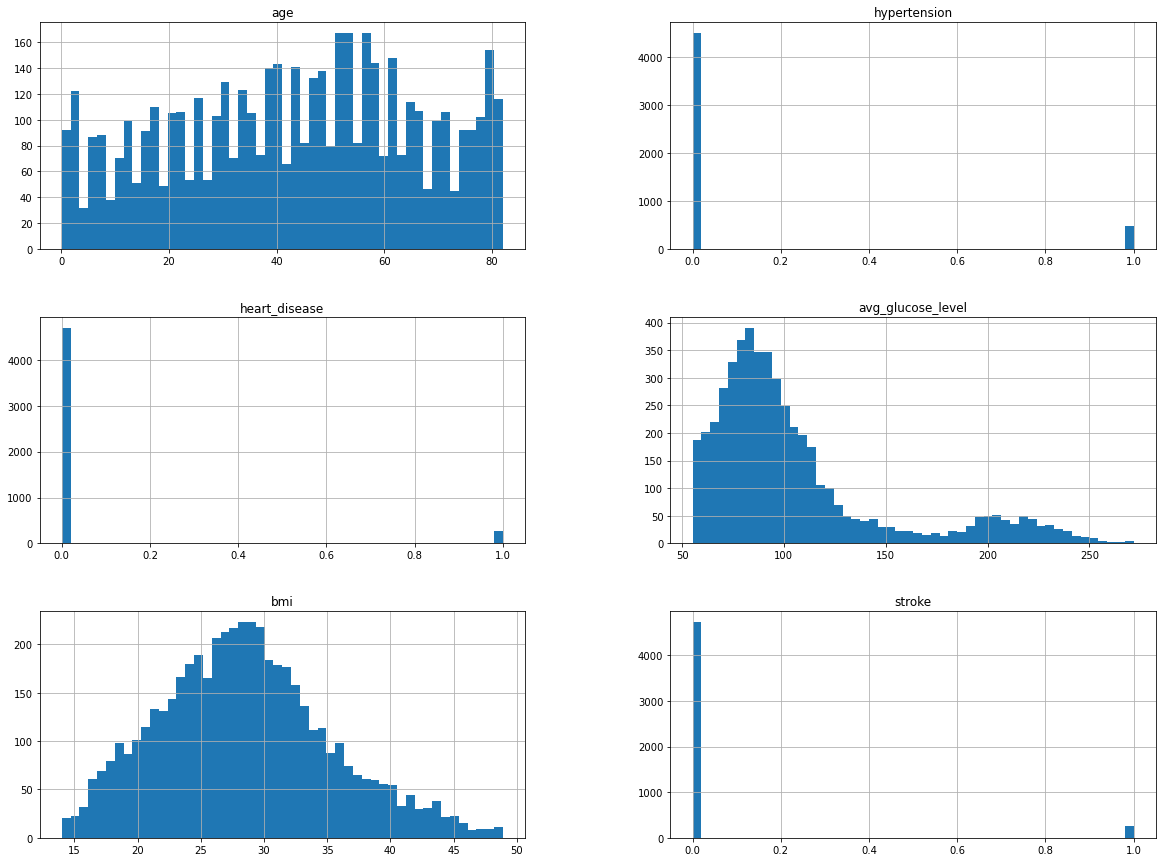

In [11]:
#To plot a histogram for each numerical attribute
brain.hist(bins=50, figsize=(20,15))
plt.show()

# Visualizing Geographical Data

<AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>

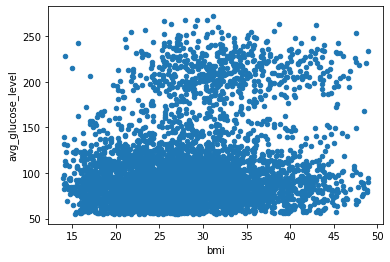

In [12]:
brain.plot(kind="scatter", y="avg_glucose_level", x="bmi")

<AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>

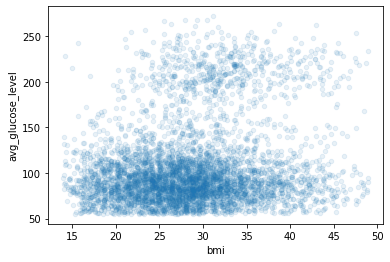

In [13]:
brain.plot(kind="scatter", y="avg_glucose_level", x="bmi", alpha=0.1)

In [14]:
corr_matrix = brain.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes

In [15]:
corr_matrix["stroke"].sort_values(ascending=False)

stroke               1.000000
age                  0.246478
heart_disease        0.134610
avg_glucose_level    0.133227
hypertension         0.131965
bmi                  0.056926
Name: stroke, dtype: float64

array([[<AxesSubplot:xlabel='stroke', ylabel='stroke'>,
        <AxesSubplot:xlabel='age', ylabel='stroke'>,
        <AxesSubplot:xlabel='heart_disease', ylabel='stroke'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='stroke'>,
        <AxesSubplot:xlabel='hypertension', ylabel='stroke'>,
        <AxesSubplot:xlabel='bmi', ylabel='stroke'>],
       [<AxesSubplot:xlabel='stroke', ylabel='age'>,
        <AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='heart_disease', ylabel='age'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='age'>,
        <AxesSubplot:xlabel='hypertension', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>],
       [<AxesSubplot:xlabel='stroke', ylabel='heart_disease'>,
        <AxesSubplot:xlabel='age', ylabel='heart_disease'>,
        <AxesSubplot:xlabel='heart_disease', ylabel='heart_disease'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='heart_disease'>,
        <AxesSubplot:xlabel='hypertension

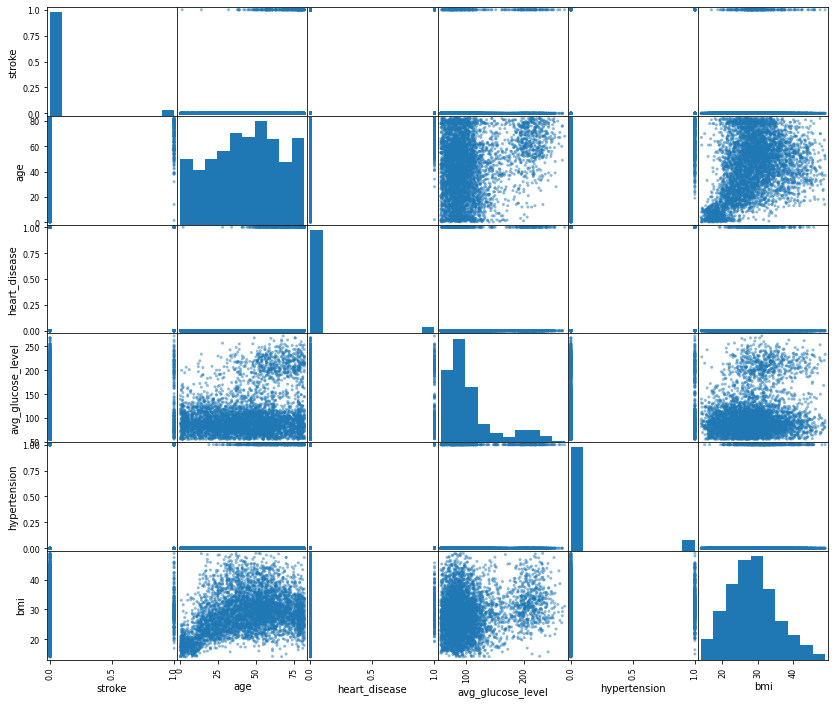

In [16]:
from pandas.plotting import scatter_matrix

attributes = ["stroke", "age", "heart_disease",
              "avg_glucose_level", "hypertension", "bmi"]
scatter_matrix(brain[attributes], figsize=(14, 12))
# Another way to check for correlation between attributes is to use the pandas scatter_matrix() function above
# Here we choose to plot 4 promising  numerical attributes against each other

<AxesSubplot:xlabel='age', ylabel='stroke'>

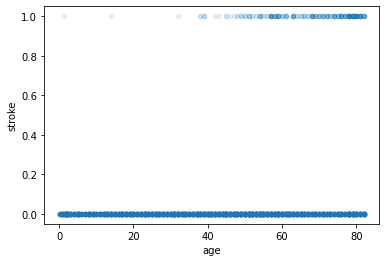

In [17]:
brain.plot(kind="scatter", x="age", y="stroke",
             alpha=0.1)

# Experimenting with Attribute Combinations

In [18]:
# Here you will generate new features. This is what we call feature engineering
brain["heart_disease_per_age"] = brain["heart_disease"]/brain["age"]
brain["glucose_per_bmi"] = brain["avg_glucose_level"]/brain["bmi"]
brain["heart_disease_per_bmi"]=brain["heart_disease"]/brain["bmi"]
brain["stroke_per_age"]=brain["stroke"]/brain["age"]

In [19]:
corr_matrix = brain.corr()
corr_matrix["stroke"].sort_values(ascending=False)
# Now you are checking the correlations given the new features 

stroke                   1.000000
stroke_per_age           0.354299
age                      0.246478
heart_disease            0.134610
avg_glucose_level        0.133227
hypertension             0.131965
heart_disease_per_bmi    0.129497
glucose_per_bmi          0.072858
bmi                      0.056926
heart_disease_per_age    0.050723
Name: stroke, dtype: float64

# Prepare the Data for Machine Learning Algorithms

In [20]:
# Now you will start by looking at your missing values
brain = brain.drop("heart_disease_per_age", axis=1)
brain = brain.drop("glucose_per_bmi", axis=1)
brain = brain.drop("heart_disease_per_bmi", axis=1)
brain = brain.drop("stroke_per_age", axis=1)
brain.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## Data Cleaning
Dealing with missing features


1. Get rid of the corresponding districts. `dropna()`
2. Get rid of the whole attribute. `drop()` 
3. Set the values to some value (zero, the mean, the median, etc.)  `fillna()`


## Scikit-Learn solution, find the best attributes


In [21]:
from sklearn.impute import SimpleImputer      # Look up SimpleImputer Class in Sklearn Documenation
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
imputer = SimpleImputer(strategy="median")    # Replace each missing attribute with median of that attribute 

In [22]:
mapping = {'Male': 0, 'Female': 1, 'Yes': 1, 'No': 0, 'Unknown': 0, 'never smoked' : 1, 'formerly smoked' : 2, 'smokes': 3}
brain = brain.replace({'gender': mapping, 'ever_married' : mapping, 'smoking_status': mapping})
brain_num = brain.drop(["work_type", "Residence_type"], axis=1)
brain_num["stroke_per_age"]=brain_num["stroke"]/brain_num["age"]
brain_num["stroke_per_glucose"]=brain_num["stroke"]/brain_num["avg_glucose_level"]
brain_num["stroke_per_heart_disease"]=brain_num["stroke"]/brain_num["heart_disease"]
brain_num["stroke_per_hypertension"]=brain_num["stroke"]/brain_num["hypertension"]
brain_num.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke,stroke_per_age,stroke_per_glucose,stroke_per_heart_disease,stroke_per_hypertension
0,0,67.0,0,1,1,228.69,36.6,2,1,0.014925,0.004373,1.0,inf
1,0,80.0,0,1,1,105.92,32.5,1,1,0.012500,0.009441,1.0,inf
2,1,49.0,0,0,1,171.23,34.4,3,1,0.020408,0.005840,inf,inf
3,1,79.0,1,0,1,174.12,24.0,1,1,0.012658,0.005743,inf,1.0
4,0,81.0,0,0,1,186.21,29.0,2,1,0.012346,0.005370,inf,inf


In [23]:
corr_matrix = brain_num.corr()
corr_matrix["stroke"].sort_values(ascending=False)

stroke                      1.000000
stroke_per_heart_disease    1.000000
stroke_per_hypertension     1.000000
stroke_per_glucose          0.916501
stroke_per_age              0.354299
age                         0.246478
heart_disease               0.134610
avg_glucose_level           0.133227
hypertension                0.131965
ever_married                0.108398
bmi                         0.056926
smoking_status              0.054793
gender                     -0.008870
Name: stroke, dtype: float64

In [24]:
X = brain_num.iloc[:,0:8]  #independent columns
y = brain_num.iloc[:,8]
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))

               Specs        Score
1                age  3578.674662
5  avg_glucose_level  1695.196533
3      heart_disease    85.272411
2       hypertension    78.401543
6                bmi    26.111232


[0.02148748 0.27606778 0.02278272 0.02043794 0.01610368 0.29843979
 0.27272634 0.07195427]


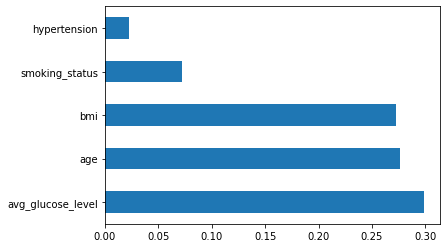

In [25]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [26]:
brain_num = brain_num.drop("stroke_per_heart_disease", axis=1)
brain_num = brain_num.drop("stroke_per_hypertension", axis=1)
imputer.fit(brain_num)

SimpleImputer(strategy='median')

The imputer has simply computed the median of each attribute and stored the result in its `statistics_` instance variable. 

In [27]:
imputer.statistics_

array([ 1.  , 45.  ,  0.  ,  0.  ,  1.  , 91.85, 28.1 ,  1.  ,  0.  ,
        0.  ,  0.  ])

In [28]:
brain_num.median().values #Check that this is the same as manually computing the median of each attribute


array([ 1.  , 45.  ,  0.  ,  0.  ,  1.  , 91.85, 28.1 ,  1.  ,  0.  ,
        0.  ,  0.  ])

In [29]:
X = imputer.transform(brain_num) # transform the data set

In [30]:
brain_tr = pd.DataFrame(X, columns=brain_num.columns,
                          index=brain_num.index) # load the new tranformed data set into the pandas frame housing_tr